<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;">  Part I

In [254]:
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functools
import operator
%matplotlib inline

# Import data preparation libraries
from matplotlib.cbook import boxplot_stats  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE 

# Import machine learning libraries
from sklearn.neighbors import KNeighborsClassifier

# Import model evaluation libraries
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  1. Import and warehouse data:

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Import all the given datasets and explore shape and size of each

In [255]:
# Import all the parts of the data
data_normal = pd.read_csv('Part1_Normal.csv')
data_type_h = pd.read_csv('Part1_Type_H.csv')
data_type_s = pd.read_csv('Part1_Type_S.csv')

In [256]:
# Check size and shape of the data
print(data_normal.size)
print(data_type_h.size)
print(data_type_s.size)
print(data_normal.shape)
print(data_type_h.shape)
print(data_type_s.shape)

700
420
1050
(100, 7)
(60, 7)
(150, 7)


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Merge all datasets onto one and explore final shape and size

In [257]:
data = pd.concat([data_normal,data_type_h,data_type_s])
print(data.size)
print(data.shape)

2170
(310, 7)


In [258]:
data.reset_index(inplace=True, drop=True)
data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  2. Data cleansing:

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Explore and if required correct the datatypes of each attribute

In [259]:
# Check the data types of the first part of data
data_normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [260]:
# Check the data types of the second part of data
data_type_h.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [261]:
# Check the data types of the third part of data
data_type_s.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [262]:
data.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

We can observe that the Class column is not numeric. Hence, we need to employ encoding techniques for the conversion purpose. 

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Explore for null values in the attributes and if required drop or impute values.

In [263]:
data.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

It can be observed that there are no null values in the given data. However, the column names are not homogenized. This is corrected below.

In [264]:
data['Class'] = data['Class'].replace(['Nrmal','type_h','tp_s'],['Normal','Type_H','Type_S'])

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  3. Data analysis & visualisation

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Perform detailed statistical analysis on the data

In [265]:
data.nunique()

P_incidence    310
P_tilt         310
L_angle        280
S_slope        281
P_radius       310
S_Degree       310
Class            3
dtype: int64

In [266]:
data_normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [267]:
data_type_h.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [268]:
data_type_s.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [269]:
data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [270]:
data_normal.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
std,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483
min,30.741938,-5.845994,19.071075,17.386972,100.501192,-11.058179
25%,42.817849,8.799951,35.000000,32.340487,118.182659,-1.511360
50%,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710
75%,61.470097,16.785953,51.602346,44.608788,129.040401,4.968807
max,89.834676,29.894119,90.563461,67.195460,147.894637,31.172767


In [271]:
data_type_h.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
std,10.697131,7.016708,9.767795,7.555388,9.355720,5.531177
min,26.147921,3.144669,14.000000,13.366931,84.241415,-10.675871
25%,41.018099,12.874329,29.038069,25.215275,112.280320,-0.910819
50%,46.416169,16.949285,35.164873,30.000659,116.696146,2.542441
75%,53.922329,22.002980,42.011563,34.962103,122.042999,6.059666
max,74.433593,41.557331,62.275275,46.613539,137.540613,15.779697


In [272]:
data_type_s.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687
std,15.109337,11.506169,16.397068,12.318813,15.579995,40.108030
min,37.903910,-6.554948,24.710274,19.290046,70.082575,1.010041
25%,60.658136,13.461149,52.000000,43.166815,104.706761,30.393271
50%,72.149306,19.309548,62.555200,50.751695,114.842400,42.372509
75%,81.075893,29.229680,76.990924,56.675435,123.337307,61.894425
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [273]:
data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


It can be observed that the variables have their mean greater than their median, indicating that their distributions may be skewed.

In [274]:
data.corr().style.background_gradient(cmap='BuGn')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


1. The highest correlation is between the 'P_incidence' and 'S_slope' columns.
2. The 'Class' column seems to has a higher correlation with all the columns except 'P_tilt' and 'P_radius'. 
3. Also, there is a negative correlation between the 'Class' and 'P_radius' columns

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Univariate analysis

Text(0.5, 1.0, 'P_tilt')

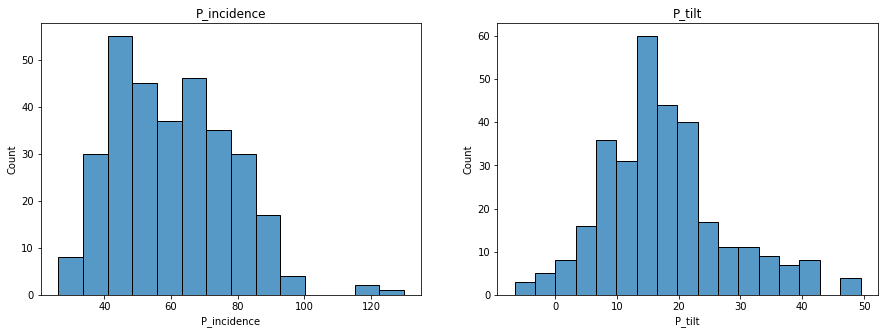

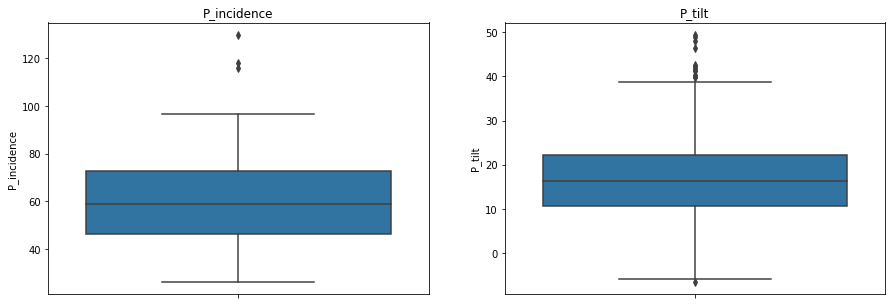

In [275]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['P_incidence'], ax = ax[0])
sns.histplot(data['P_tilt'], ax = ax[1])

ax[0].set_title('P_incidence')
ax[1].set_title('P_tilt')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "P_incidence",data=data, ax = ax[0])
sns.boxplot(y = "P_tilt",data=data, ax = ax[1])

ax[0].set_title('P_incidence')
ax[1].set_title('P_tilt')


The data of both the 'P_incidence' and 'P_tilt' columns seem to be well distributed.

Text(0.5, 1.0, 'S_slope')

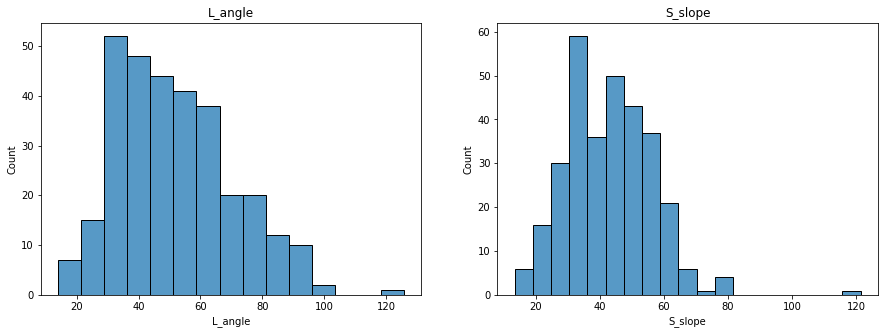

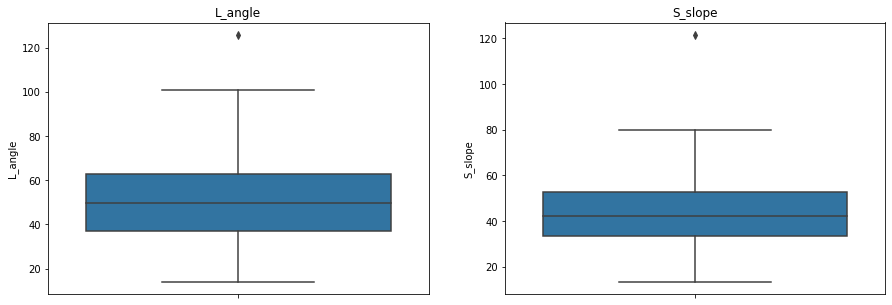

In [276]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['L_angle'], ax = ax[0])
sns.histplot(data['S_slope'], ax = ax[1])

ax[0].set_title('L_angle')
ax[1].set_title('S_slope')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "L_angle",data=data, ax = ax[0])
sns.boxplot(y = "S_slope",data=data, ax = ax[1])

ax[0].set_title('L_angle')
ax[1].set_title('S_slope')

1. The data of the 'L_angle' column seems to have an outlier but it is not a significant one.
2. However, the data of the 'S_slope' column seems to be skewed with a significant outlier.  

Text(0.5, 1.0, 'S_Degree')

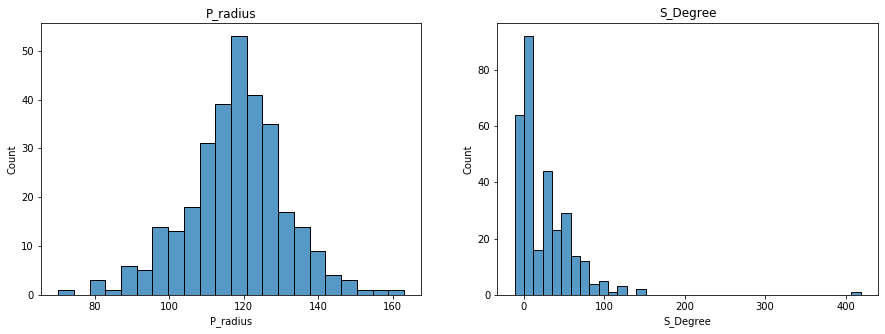

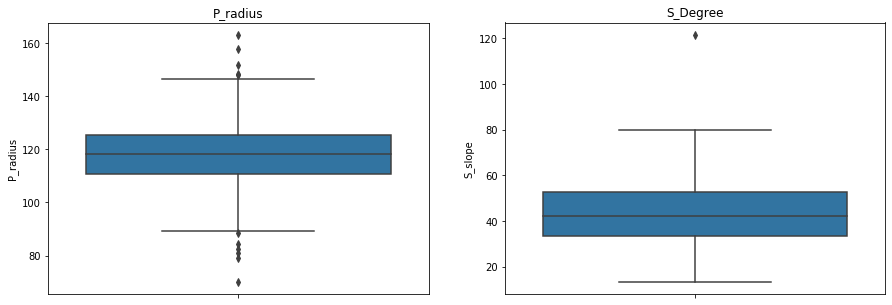

In [277]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['P_radius'], ax = ax[0])
sns.histplot(data['S_Degree'], ax = ax[1])

ax[0].set_title('P_radius')
ax[1].set_title('S_Degree')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "P_radius",data=data, ax = ax[0])
sns.boxplot(y = "S_slope",data=data, ax = ax[1])

ax[0].set_title('P_radius')
ax[1].set_title('S_Degree')

1. The data of the 'P_radius' column seems to be seem to be well distributed. 
2. The data of the 'S_Degree' column seems to be skewed with a significant outlier. 

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Bivariate analysis

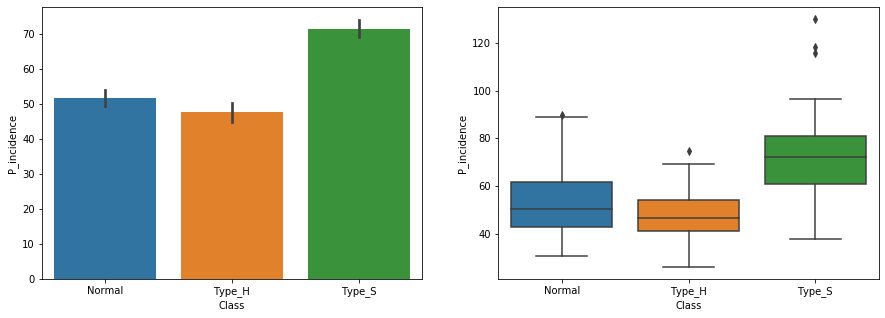

In [278]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Class",y = "P_incidence",data=data, ax = ax[0])
sns.boxplot(x="Class",y = "P_incidence",data=data, ax = ax[1])

1. The median of the 'P_incidence' data that belongs to the class 2 is higher than the other ones.
2. The IQR of the 'P_incidence' data that belongs to the class 1 is significantly smaller than the others.

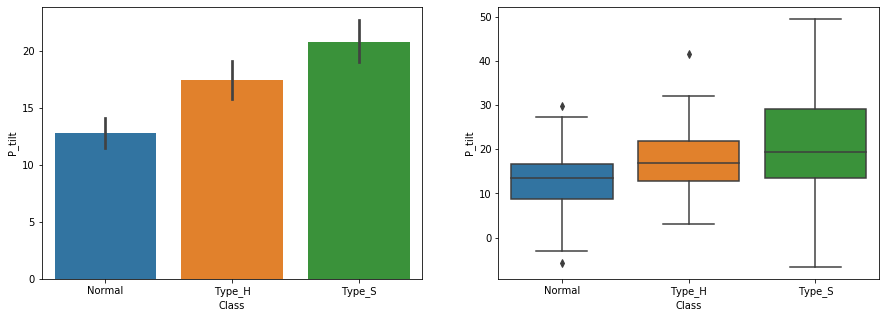

In [279]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Class",y = "P_tilt",data=data, ax = ax[0])
sns.boxplot(x="Class",y = "P_tilt",data=data, ax = ax[1])

1. The medians of the 'P_tilt' data that belongs to the classes 0,1 and 2 are close to each other.
2. The IQR of the 'P_tilt' data that belongs to the class 2 is significantly larger than the others.

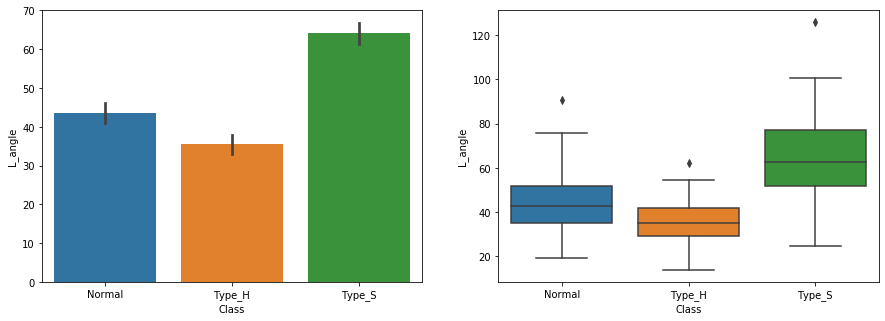

In [280]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Class",y = "L_angle",data=data, ax = ax[0])
sns.boxplot(x="Class",y = "L_angle",data=data, ax = ax[1])

1. The median of the 'L_angle' data that belongs to the class 2 is higher than the other ones.
2. Also, The IQR of the 'L_angle' data that belongs to the class 2 is significantly larger than the others.

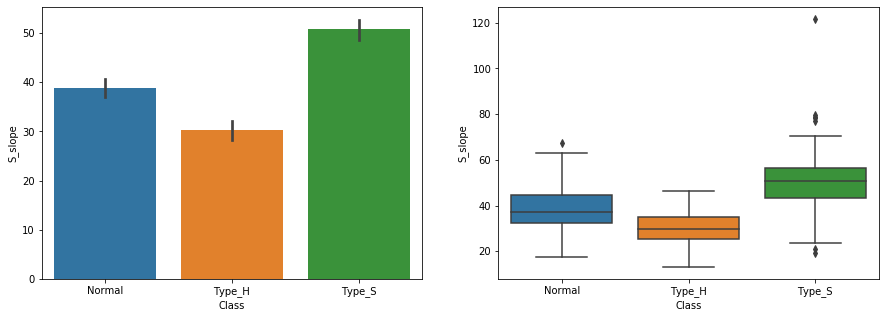

In [281]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Class",y = "S_slope",data=data, ax = ax[0])
sns.boxplot(x="Class",y = "S_slope",data=data, ax = ax[1])

Similar to the previous cases, the median of the 'S_slope' data that belongs to the class 2 is higher than the other ones.

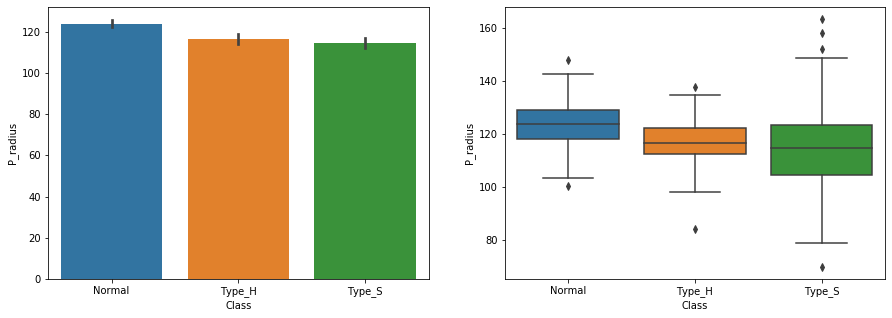

In [282]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Class",y = "P_radius",data=data, ax = ax[0])
sns.boxplot(x="Class",y = "P_radius",data=data, ax = ax[1])

The medians of the 'P_radius' data that belongs to all the classes seem to be close.

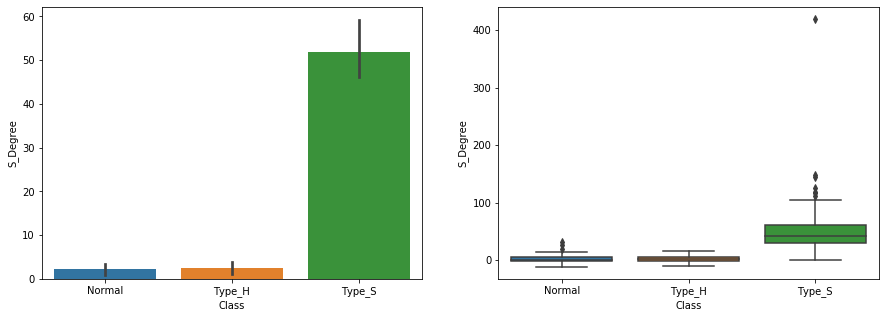

In [283]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.barplot(x="Class",y = "S_Degree",data=data, ax = ax[0])
sns.boxplot(x="Class",y = "S_Degree",data=data, ax = ax[1])

The median of the 'S_Degree' data that belongs to the class 2 is significantly higher than the other ones.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 4 Data pre-processing

In [284]:
# Convert the class variable to numeric data type
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

In [285]:
data.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Segregate predictors vs target attributes

In [286]:
X = data.drop(labels='Class',axis=1)
y = data['Class']

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Perform normalisation or scaling 

In [287]:
XScaled  = X.apply(zscore)
XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,8.702716e-17,2.326096e-16,1.980495e-16,5.121351e-17,-6.274551e-16,-8.156558e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Check for target balancing

In [288]:
data['Class'].value_counts(normalize='True')

2    0.483871
0    0.322581
1    0.193548
Name: Class, dtype: float64

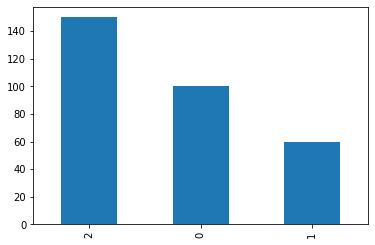

In [289]:
pd.value_counts(data["Class"]).plot(kind="bar")

Here, we see that the target variable is not balanced. We try to balance the target variable later. For now, we proceed to the machine learning step.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Perform train-test split

In [290]:
# Consider 30% data for the training purposes
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.3, random_state=1)

In [291]:
y_train.value_counts(normalize='True')

2    0.470046
0    0.331797
1    0.198157
Name: Class, dtype: float64

In [292]:
y_test.value_counts(normalize='True')

2    0.516129
0    0.301075
1    0.182796
Name: Class, dtype: float64

Here, we see that the training and the testing variables are also imbalanced. However, the proportion of different classes is close to that of the original data.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 5 Model training, testing and tuning

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Design and train a KNN classifier

Here, we consider K value to be 5. Later, we study the effect of different K values and choose an optimal one.

In [293]:
NNH = KNeighborsClassifier(n_neighbors=5)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Classification accuracies for train and test data

In [294]:
print('Classification accuracy of the test data :',NNH.score(X_train, y_train))

Classification accuracy of the test data : 0.8571428571428571


In [295]:
print('Classification accuracy of the test data :',NNH.score(X_test, y_test)) 

Classification accuracy of the test data : 0.7419354838709677


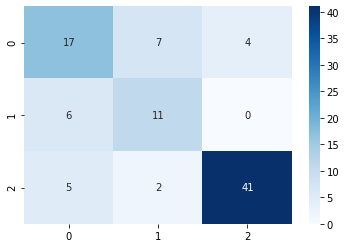

In [296]:
conf_mat = metrics.confusion_matrix(y_test,predicted_labels)
df_conf_mat = pd.DataFrame(conf_mat)
sns.heatmap(df_conf_mat,annot=True,cmap='Blues',fmt='g')

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Classification report in detail

In [297]:
print(metrics.classification_report(y_test,predicted_labels,digits=2))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        28
           1       0.55      0.65      0.59        17
           2       0.91      0.85      0.88        48

    accuracy                           0.74        93
   macro avg       0.69      0.70      0.69        93
weighted avg       0.75      0.74      0.75        93



Using K = 5: 
1. We observe that 61%, 55% and 91% of the testing varaibles is correctly identified as positive out of the total identified positives of classes 0, 1 and 2 respectively.
2.  We observe that 61%, 65% and 85% of the testing varaibles is correctly identified as positive out of the total true actual positives of classes 0, 1 and 2 respectively.
3. Also, we observe that 74% of the testing varaibles is correctly identified as either truly positive or truly negative out of all the testing varaibles.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Automate the task of finding best values of K for KNN

In [298]:
K = range(1,50,2)
score_list = []
predicted_labels = [[]]*len(K)

for i in range(0,len(K)):
    NNH = KNeighborsClassifier(n_neighbors=K[i],weights='distance')
    NNH.fit(X_train, y_train)
    predicted_labels[i].append(NNH.predict(X_test))
    score = NNH.score(X_test, y_test)
    score_list.append(score)

In [299]:
K_opt = K[score_list.index(max(score_list))]
K_opt

21

In [300]:
highest_score = max(score_list)
highest_score

0.8064516129032258

We observe that the optimum value of K equal to 21 gives an accuracy of 81%. Later we will tune the hyperparameters using grid search and compare with these results.

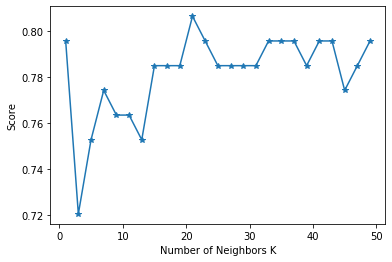

In [301]:
plt.plot(K, score_list,'-*')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Score')
plt.show()

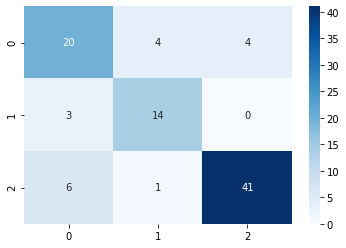

In [302]:
conf_mat = metrics.confusion_matrix(y_test,predicted_labels[score_list.index(max(score_list))][score_list.index(max(score_list))])
df_conf_mat = pd.DataFrame(conf_mat)
sns.heatmap(df_conf_mat,annot=True,cmap='Blues',fmt='g')

In [303]:
print(metrics.classification_report(y_test,predicted_labels[score_list.index(max(score_list))][score_list.index(max(score_list))],digits=2))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        28
           1       0.74      0.82      0.78        17
           2       0.91      0.85      0.88        48

    accuracy                           0.81        93
   macro avg       0.78      0.80      0.79        93
weighted avg       0.81      0.81      0.81        93



Using K = 21: 
1. We observe that 69%, 74% and 91% of the testing varaibles is correctly identified as positive out of the total identified positives of classes 0, 1 and 2 respectively.
2.  We observe that 71%, 82% and 85% of the testing varaibles is correctly identified as positive out of the total true actual positives of classes 0, 1 and 2 respectively.
3. Also, we observe that 81% of the testing varaibles is correctly identified as either truly positive or truly negative out of all the testing varaibles.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Apply all the possible tuning techniques to train the best model for the given data

Here, we tune the parameters using grid search. The tuning parameters considered here are:
1. different ways of considering weights: uniform - equal weights for all the data, distance - weights inversely proportional to the distance.
2. different ways of calculating distance: euclidean - L2 norm, manhattan - L1 norm, minkowski - L$\infty$ norm.

In [304]:
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

hyperparameters = dict(n_neighbors=K,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(KNeighborsClassifier(),hyperparameters,cv=cv,scoring='accuracy')
best_model = grid_search.fit(X_train,y_train)

print('Best K: ', (best_model.best_estimator_.get_params()['n_neighbors']))
print('Best weights: ', (best_model.best_estimator_.get_params()['weights']))
print('Best metric: ', (best_model.best_estimator_.get_params()['metric']))
print('Best accuracy: ', (best_model.best_score_))

Best K:  19
Best weights:  distance
Best metric:  euclidean
Best accuracy:  0.8075757575757575


1. Using grid search, we find that the best value of K is 19 which is different from 21 found earlier. 
2. However, the accuracy is approximately the same. 

We conclude that the model with K = 19 or 21 with weights inversely proportional to the distance which is caluclated as euclidean distance as the optimal model.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Target balancing using SMOTE

In [310]:
smote = SMOTE(random_state=7)
X_train_bal,y_train_bal = smote.fit_resample(XScaled,y)
y_train_bal.value_counts(normalize='True')

2    0.333333
1    0.333333
0    0.333333
Name: Class, dtype: float64

In [311]:
K = range(1,50,2)
score_list = []
predicted_labels = [[]]*len(K)

for i in range(0,len(K)):
    NNH = KNeighborsClassifier(n_neighbors=K[i],weights='uniform')
    NNH.fit(X_train_bal, y_train_bal)
    predicted_labels[i].append(NNH.predict(X_test))
    score = NNH.score(X_test, y_test)
    score_list.append(score)

In [312]:
K_opt = K[score_list.index(max(score_list))]
K_opt

1

In [313]:
highest_score = max(score_list)
highest_score

1.0

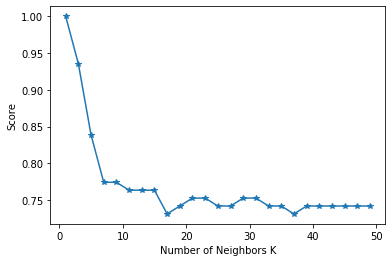

In [314]:
plt.plot(K, score_list,'-*')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Score')
plt.show()

After target balancing, we observe that the model is over-fitted. For this reason, we observe that the K equal to 1 gives the best accuracy.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 6 Conclusions

1. The given classification problem consists of 3 medical conditions.
2. From the EDA, it is observed that 4 of the 6 variables have a strong correlation with the target variable which is the class of the medical condition.
3. By using the K-nearest neighbor algorithm, we are able to obtain a machine learning model with 81% accuracy.
4. Standardization of the data improved the performance.
5.The target balancing using SMOTE is not improve any results.
6. There may be few cases that are misclassified but the class 2 is classified mostly correct.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 7 Improvisations

1. The data seem to be well collected as the correlation netween various variables are quite high.
2. However, for better analysis,  the data can be improved with several different attributes.
3. Also, one should try SVM, Decision tree etc... to obtain better results.

<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;">  Part II

In [315]:
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import data preparation libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.impute import SimpleImputer

# Import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Import model evaluation libraries
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  1. Import and warehouse data:

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Import all the given datasets and explore shape and size of each

In [316]:
# Import the two parts of the data
data1 = pd.read_csv('Part2_Data1.csv')
data2 = pd.read_csv('Part2_Data2.csv')

In [317]:
# Check size and shape of the data
print(data1.size)
print(data2.size)
print(data1.shape)
print(data2.shape)

40000
35000
(5000, 8)
(5000, 7)


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Merge all datasets onto one and explore final shape and size

In [318]:
data = pd.concat([data1,data2],axis=1)
print(data.size)
print(data.shape)

75000
(5000, 15)


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  2. Data cleansing:

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Explore and if required correct the datatypes of each attribute

In [319]:
# Check the data types of the first part of data
data1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [320]:
# Check the data types of the second part of data
data2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [321]:
data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

The given data consists of only numeric data types. Hence there is no need to employ any encoding techniques. 

In [322]:
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,2,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,3,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,4,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,5,0,0,0,0,1,NaN


The columns titled 'ID' and 'ZipCode' have one-to-one mapping and can be dropped.

In [323]:
data = data.drop(['ID','ZipCode'],axis=1)

In [324]:
data.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,NaN
1,45,19,34,3,1.5,1,0,1,0,0,0,NaN
2,39,15,11,1,1.0,1,0,0,0,0,0,NaN
3,35,9,100,1,2.7,2,0,0,0,0,0,NaN
4,35,8,45,4,1.0,2,0,0,0,0,1,NaN


It can be seen from the data that there are some null values. These are imputed in the next section.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Explore for null values in the attributes and if required drop or impute values.

In [325]:
# Get the total number of null values in the data
data.isna().sum()

Age                     0
CustomerSince           0
HighestSpend            0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [326]:
# Impute the null values using the most frequently occuring values in the respective column
columns = data.columns
imputer = SimpleImputer(missing_values = np.nan, strategy ='most_frequent',copy=False)
data_imp = pd.DataFrame(imputer.fit_transform(data))

In [327]:
data_imp.columns=data.columns
data = data_imp

In [328]:
data.isna().sum()

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

It can be seen from the above result that all the null values are successfully imputed.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  3. Data analysis & visualisation

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Perform detailed statistical analysis on the data

In [329]:
data.nunique()

Age                     45
CustomerSince           47
HighestSpend           162
HiddenScore              4
MonthlyAverageSpend    108
Level                    3
Mortgage               347
Security                 2
FixedDepositAccount      2
InternetBanking          2
CreditCard               2
LoanOnCard               2
dtype: int64

The data has 5 continuous variables and 7 class variables. Here, the target variable 'LoanOnCard' has 2 classes. 

In [330]:
data.describe()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


1. Here, the variables titled 'Age' and 'CustomerSince' have its mean close to its median, indicating that their distributions are not skewed.
2. However, the mean of the variables 'HighestSpend', 'MonthlyAverageSpend' and 'Mortgage' is greater than their median values which indicates that their distribution is skewed.
3. Also, among all the columns, the 'Mortgage' column is highly skewed as its mean is significantly higher than its medain. 

In [331]:
data.corr().style.background_gradient(cmap='BuGn')

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
CustomerSince,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007413
HighestSpend,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
HiddenScore,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
MonthlyAverageSpend,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Level,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Security,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954
FixedDepositAccount,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644,0.316355
InternetBanking,0.013702,0.013898,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.012627,0.175880,1.000000,0.004210,0.006278


1. The highest correlation is among the 'Age' and the 'CustomerSince' columns since the customers that have longer association with the bank tend be the older people. 
2. Also, there is a significant correlation between the 'HighestSpend' and the 'MonthlyAverageSpend' which also seems appropriate since people who spend high tend to have more monthly expense. 
3.  Finally, the target variable 'LoanOnCard' is highly correlated with 'HighestSpend', 'MonthlyAverageSpend' and 'FixedDepositAccount' columns. This is because the people who spend more tend to take loan from bank frequently. Also, people who have a fixed deposit account may also take a loan against it as it may result in net positive interest. 

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis

Text(0.5, 1.0, 'CustomerSince')

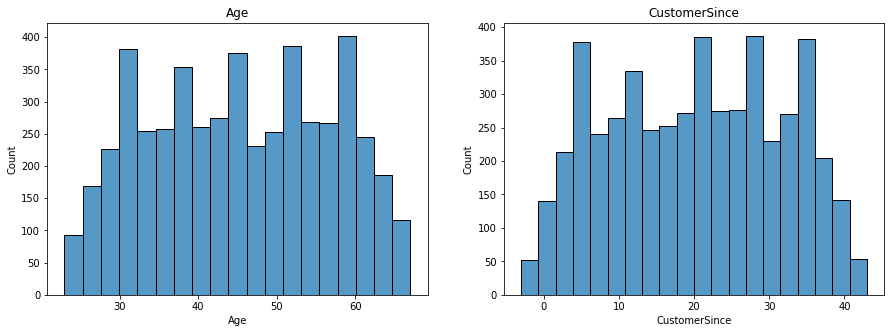

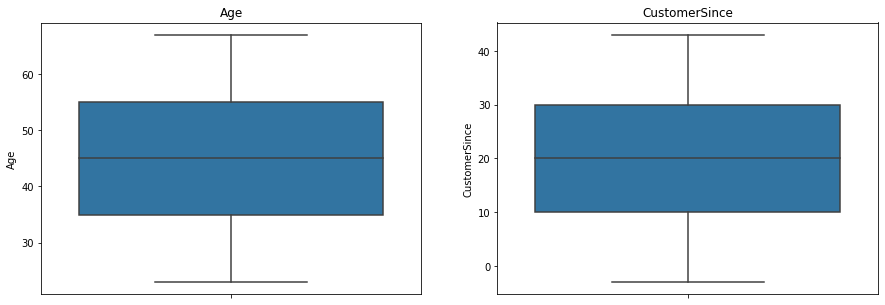

In [190]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['Age'], ax = ax[0])
sns.histplot(data['CustomerSince'], ax = ax[1])

ax[0].set_title('Age')
ax[1].set_title('CustomerSince')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "Age",data=data, ax = ax[0])
sns.boxplot(y = "CustomerSince",data=data, ax = ax[1])

ax[0].set_title('Age')
ax[1].set_title('CustomerSince')

1. Most of the people belong to the age group of 35-55.
2. Most of the customers seems to have 10-30 units of association with the bank.

Text(0.5, 1.0, 'MonthlyAverageSpend')

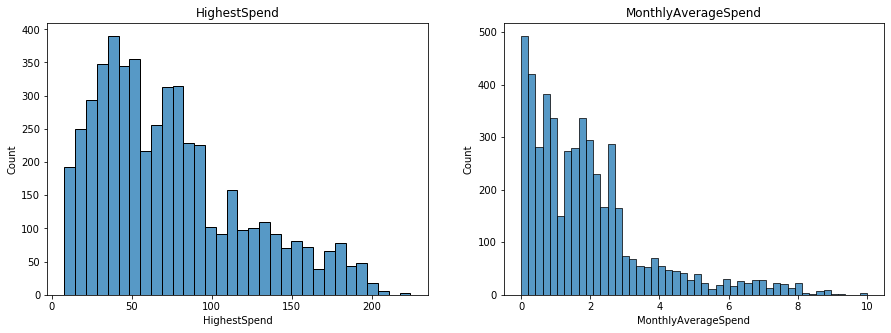

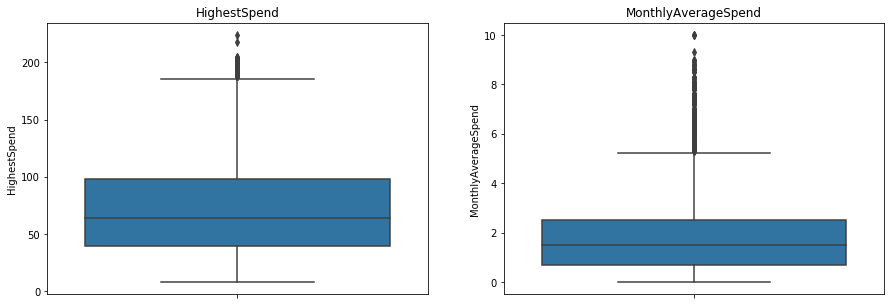

In [191]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['HighestSpend'], ax = ax[0])
sns.histplot(data['MonthlyAverageSpend'], ax = ax[1])

ax[0].set_title('HighestSpend')
ax[1].set_title('MonthlyAverageSpend')

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(y = "HighestSpend",data=data, ax = ax[0])
sns.boxplot(y = "MonthlyAverageSpend",data=data, ax = ax[1])

ax[0].set_title('HighestSpend')
ax[1].set_title('MonthlyAverageSpend')

1. Most of the people spend at their highest between 30 and 90 units.
2. Most of the people spend between 1 and 3 units on an average per month.

Text(0.5, 1.0, 'Mortgage')

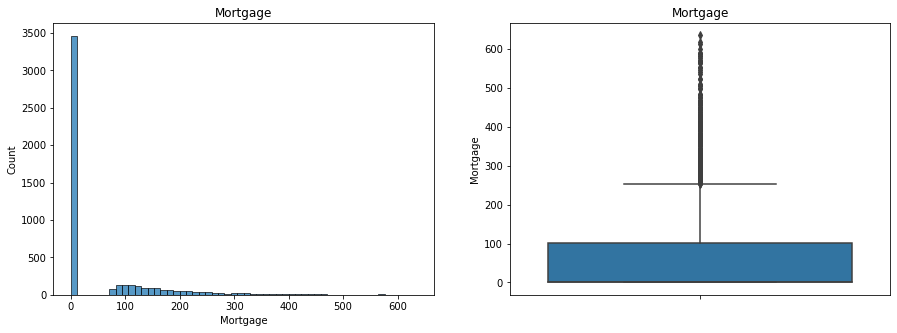

In [192]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.histplot(data['Mortgage'],ax = ax[0])
sns.boxplot(y = "Mortgage",data=data, ax = ax[1])

ax[0].set_title('Mortgage')
ax[1].set_title('Mortgage')


The number of people who took mortgage is little more than 30% of the customers. 

In [193]:
mean_age_opted = np.mean(data['Age'][data['LoanOnCard']==0])
mean_age_not_opted = np.mean(data['Age'][data['LoanOnCard']==1])

count_age_opted_less_than_mean = data['Age'][(data['Age']<mean_age_opted) & (data['LoanOnCard']==0)].count()
count_age_opted_greater_than_mean = data['Age'][(data['Age']>mean_age_opted) & (data['LoanOnCard']==0)].count()
per_age_opted_less_than_mean = round(count_age_opted_less_than_mean/(count_age_opted_less_than_mean+count_age_opted_greater_than_mean)*100,2)
per_age_opted_greater_than_mean = round(count_age_opted_greater_than_mean/(count_age_opted_less_than_mean+count_age_opted_greater_than_mean)*100,2)

count_age_not_opted_less_than_mean = data['Age'][(data['Age']<mean_age_not_opted) & (data['LoanOnCard']==1)].count()
count_age_not_opted_greater_than_mean = data['Age'][(data['Age']>mean_age_not_opted) & (data['LoanOnCard']==1)].count()
per_age_not_opted_less_than_mean = round(count_age_not_opted_less_than_mean/(count_age_not_opted_less_than_mean+count_age_not_opted_greater_than_mean)*100,2)
per_age_not_opted_greater_than_mean = round(count_age_not_opted_greater_than_mean/(count_age_not_opted_less_than_mean+count_age_not_opted_greater_than_mean)*100,2)


####
median_age_opted = np.median(data['Age'][data['LoanOnCard']==0])
median_age_not_opted = np.median(data['Age'][data['LoanOnCard']==1])

df_temp = pd.DataFrame({'Mean':[mean_age_opted,mean_age_not_opted],
                       'Count_less_than_mean':[str(count_age_opted_less_than_mean)+' (' + str(per_age_opted_less_than_mean)+'%)',str(count_age_not_opted_less_than_mean)+' (' + str(per_age_not_opted_less_than_mean)+'%)'],
                       'Count_greater_than_mean':[str(count_age_opted_greater_than_mean)+' (' + str(per_age_opted_greater_than_mean)+'%)',str(count_age_not_opted_greater_than_mean)+' (' + str(per_age_not_opted_greater_than_mean)+'%)'],
                       'Median':[median_age_opted,median_age_not_opted]},index=['Not opted','Opted'])
df_temp

,Mean,Count_less_than_mean,Count_greater_than_mean,Median
Not opted,45.367257,2271 (50.24%),2249 (49.76%),45.0
Opted,45.066667,248 (51.67%),232 (48.33%),45.0


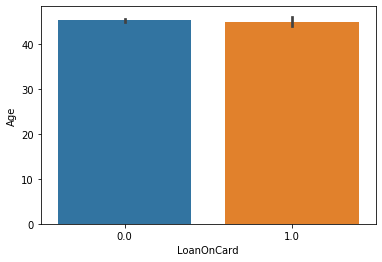

In [194]:
sns.barplot(x="LoanOnCard",y = "Age",data=data)

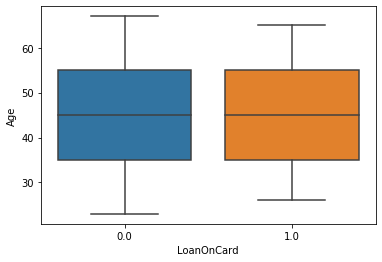

In [195]:
sns.boxplot(x="LoanOnCard",y = "Age",data=data)

1. The age of the people who took loan is between 35-55 approximately.
2. Also, the mean and the median age of the people who opted for a loan and not opted for a loan is the same.

In [196]:
mean_CustomerSince_opted = np.mean(data['CustomerSince'][data['LoanOnCard']==0])
mean_CustomerSince_not_opted = np.mean(data['CustomerSince'][data['LoanOnCard']==1])

count_CustomerSince_opted_less_than_mean = data['CustomerSince'][(data['CustomerSince']<mean_CustomerSince_opted) & (data['LoanOnCard']==0)].count()
count_CustomerSince_opted_greater_than_mean = data['CustomerSince'][(data['CustomerSince']>mean_CustomerSince_opted) & (data['LoanOnCard']==0)].count()
per_CustomerSince_opted_less_than_mean = round(count_CustomerSince_opted_less_than_mean/(count_CustomerSince_opted_less_than_mean+count_CustomerSince_opted_greater_than_mean)*100,2)
per_CustomerSince_opted_greater_than_mean = round(count_CustomerSince_opted_greater_than_mean/(count_CustomerSince_opted_less_than_mean+count_CustomerSince_opted_greater_than_mean)*100,2)

count_CustomerSince_not_opted_less_than_mean = data['CustomerSince'][(data['CustomerSince']<mean_CustomerSince_not_opted) & (data['LoanOnCard']==1)].count()
count_CustomerSince_not_opted_greater_than_mean = data['CustomerSince'][(data['CustomerSince']>mean_CustomerSince_not_opted) & (data['LoanOnCard']==1)].count()
per_CustomerSince_not_opted_less_than_mean = round(count_CustomerSince_not_opted_less_than_mean/(count_CustomerSince_not_opted_less_than_mean+count_CustomerSince_not_opted_greater_than_mean)*100,2)
per_CustomerSince_not_opted_greater_than_mean = round(count_CustomerSince_not_opted_greater_than_mean/(count_CustomerSince_not_opted_less_than_mean+count_CustomerSince_not_opted_greater_than_mean)*100,2)


####
median_CustomerSince_opted = np.median(data['CustomerSince'][data['LoanOnCard']==0])
median_CustomerSince_not_opted = np.median(data['CustomerSince'][data['LoanOnCard']==1])

df_temp = pd.DataFrame({'Mean':[mean_CustomerSince_opted,mean_CustomerSince_not_opted],
                       'Count_less_than_mean':[str(count_CustomerSince_opted_less_than_mean)+' (' + str(per_CustomerSince_opted_less_than_mean)+'%)',str(count_CustomerSince_not_opted_less_than_mean)+' (' + str(per_CustomerSince_not_opted_less_than_mean)+'%)'],
                       'Count_greater_than_mean':[str(count_CustomerSince_opted_greater_than_mean)+' (' + str(per_CustomerSince_opted_greater_than_mean)+'%)',str(count_CustomerSince_not_opted_greater_than_mean)+' (' + str(per_CustomerSince_not_opted_greater_than_mean)+'%)'],
                       'Median':[median_CustomerSince_opted,median_CustomerSince_not_opted]},index=['Not opted','Opted'])
df_temp

,Mean,Count_less_than_mean,Count_greater_than_mean,Median
Not opted,20.132301,2291 (50.69%),2229 (49.31%),20.0
Opted,19.843750,234 (48.75%),246 (51.25%),20.0


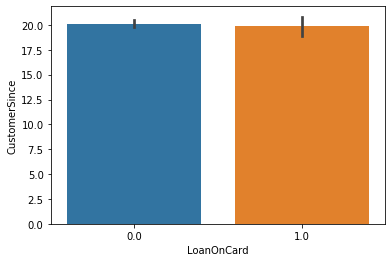

In [197]:
sns.barplot(x="LoanOnCard",y = "CustomerSince",data=data)

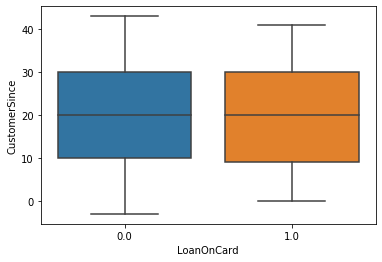

In [198]:
sns.boxplot(x="LoanOnCard",y = "CustomerSince",data=data)


1. The people who took loan are associated between 10 and 30 units.
2. Also, similar to the previous case, the mean and the median units of association of the people who opted for a loan and not opted for a loan is the same.

In [199]:
mean_HighestSpend_opted = np.mean(data['HighestSpend'][data['LoanOnCard']==0])
mean_HighestSpend_not_opted = np.mean(data['HighestSpend'][data['LoanOnCard']==1])

count_HighestSpend_opted_less_than_mean = data['HighestSpend'][(data['HighestSpend']<mean_HighestSpend_opted) & (data['LoanOnCard']==0)].count()
count_HighestSpend_opted_greater_than_mean = data['HighestSpend'][(data['HighestSpend']>mean_HighestSpend_opted) & (data['LoanOnCard']==0)].count()
per_HighestSpend_opted_less_than_mean = round(count_HighestSpend_opted_less_than_mean/(count_HighestSpend_opted_less_than_mean+count_HighestSpend_opted_greater_than_mean)*100,2)
per_HighestSpend_opted_greater_than_mean = round(count_HighestSpend_opted_greater_than_mean/(count_HighestSpend_opted_less_than_mean+count_HighestSpend_opted_greater_than_mean)*100,2)

count_HighestSpend_not_opted_less_than_mean = data['HighestSpend'][(data['HighestSpend']<mean_HighestSpend_not_opted) & (data['LoanOnCard']==1)].count()
count_HighestSpend_not_opted_greater_than_mean = data['HighestSpend'][(data['HighestSpend']>mean_HighestSpend_not_opted) & (data['LoanOnCard']==1)].count()
per_HighestSpend_not_opted_less_than_mean = round(count_HighestSpend_not_opted_less_than_mean/(count_HighestSpend_not_opted_less_than_mean+count_HighestSpend_not_opted_greater_than_mean)*100,2)
per_HighestSpend_not_opted_greater_than_mean = round(count_HighestSpend_not_opted_greater_than_mean/(count_HighestSpend_not_opted_less_than_mean+count_HighestSpend_not_opted_greater_than_mean)*100,2)


####
median_HighestSpend_opted = np.median(data['HighestSpend'][data['LoanOnCard']==0])
median_HighestSpend_not_opted = np.median(data['HighestSpend'][data['LoanOnCard']==1])

df_temp = pd.DataFrame({'Mean':[mean_HighestSpend_opted,mean_HighestSpend_not_opted],
                       'Count_less_than_mean':[str(count_HighestSpend_opted_less_than_mean)+' (' + str(per_HighestSpend_opted_less_than_mean)+'%)',str(count_HighestSpend_not_opted_less_than_mean)+' (' + str(per_HighestSpend_not_opted_less_than_mean)+'%)'],
                       'Count_greater_than_mean':[str(count_HighestSpend_opted_greater_than_mean)+' (' + str(per_HighestSpend_opted_greater_than_mean)+'%)',str(count_HighestSpend_not_opted_greater_than_mean)+' (' + str(per_HighestSpend_not_opted_greater_than_mean)+'%)'],
                       'Median':[median_HighestSpend_opted,median_HighestSpend_not_opted]},index=['Not opted','Opted'])
df_temp

,Mean,Count_less_than_mean,Count_greater_than_mean,Median
Not opted,66.237389,2607 (57.68%),1913 (42.32%),59.0
Opted,144.745833,246 (51.25%),234 (48.75%),142.5


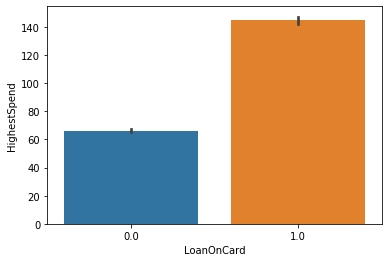

In [200]:
sns.barplot(x="LoanOnCard",y = "HighestSpend",data=data)

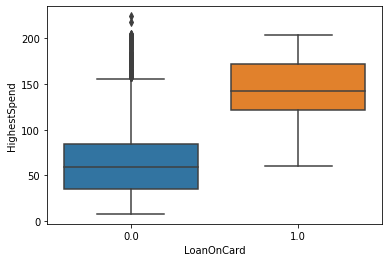

In [201]:
sns.boxplot(x="LoanOnCard",y = "HighestSpend",data=data)

1. The mean and the median highest spend of the people who took loan is significantly higher than the ones of the people who did not took the loan.
2. Also, the people who spend highest are on both the sides (opted and not opted).     

In [202]:
mean_MonthlyAverageSpend_opted = np.mean(data['MonthlyAverageSpend'][data['LoanOnCard']==0])
mean_MonthlyAverageSpend_not_opted = np.mean(data['MonthlyAverageSpend'][data['LoanOnCard']==1])

count_MonthlyAverageSpend_opted_less_than_mean = data['MonthlyAverageSpend'][(data['MonthlyAverageSpend']<mean_MonthlyAverageSpend_opted) & (data['LoanOnCard']==0)].count()
count_MonthlyAverageSpend_opted_greater_than_mean = data['MonthlyAverageSpend'][(data['MonthlyAverageSpend']>mean_MonthlyAverageSpend_opted) & (data['LoanOnCard']==0)].count()
per_MonthlyAverageSpend_opted_less_than_mean = round(count_MonthlyAverageSpend_opted_less_than_mean/(count_MonthlyAverageSpend_opted_less_than_mean+count_MonthlyAverageSpend_opted_greater_than_mean)*100,2)
per_MonthlyAverageSpend_opted_greater_than_mean = round(count_MonthlyAverageSpend_opted_greater_than_mean/(count_MonthlyAverageSpend_opted_less_than_mean+count_MonthlyAverageSpend_opted_greater_than_mean)*100,2)

count_MonthlyAverageSpend_not_opted_less_than_mean = data['MonthlyAverageSpend'][(data['MonthlyAverageSpend']<mean_MonthlyAverageSpend_not_opted) & (data['LoanOnCard']==1)].count()
count_MonthlyAverageSpend_not_opted_greater_than_mean = data['MonthlyAverageSpend'][(data['MonthlyAverageSpend']>mean_MonthlyAverageSpend_not_opted) & (data['LoanOnCard']==1)].count()
per_MonthlyAverageSpend_not_opted_less_than_mean = round(count_MonthlyAverageSpend_not_opted_less_than_mean/(count_MonthlyAverageSpend_not_opted_less_than_mean+count_MonthlyAverageSpend_not_opted_greater_than_mean)*100,2)
per_MonthlyAverageSpend_not_opted_greater_than_mean = round(count_MonthlyAverageSpend_not_opted_greater_than_mean/(count_MonthlyAverageSpend_not_opted_less_than_mean+count_MonthlyAverageSpend_not_opted_greater_than_mean)*100,2)


####
median_MonthlyAverageSpend_opted = np.median(data['MonthlyAverageSpend'][data['LoanOnCard']==0])
median_MonthlyAverageSpend_not_opted = np.median(data['MonthlyAverageSpend'][data['LoanOnCard']==1])

df_temp = pd.DataFrame({'Mean':[mean_MonthlyAverageSpend_opted,mean_MonthlyAverageSpend_not_opted],
                       'Count_less_than_mean':[str(count_MonthlyAverageSpend_opted_less_than_mean)+' (' + str(per_MonthlyAverageSpend_opted_less_than_mean)+'%)',str(count_MonthlyAverageSpend_not_opted_less_than_mean)+' (' + str(per_MonthlyAverageSpend_not_opted_less_than_mean)+'%)'],
                       'Count_greater_than_mean':[str(count_MonthlyAverageSpend_opted_greater_than_mean)+' (' + str(per_MonthlyAverageSpend_opted_greater_than_mean)+'%)',str(count_MonthlyAverageSpend_not_opted_greater_than_mean)+' (' + str(per_MonthlyAverageSpend_not_opted_greater_than_mean)+'%)'],
                       'Median':[median_MonthlyAverageSpend_opted,median_MonthlyAverageSpend_not_opted]},index=['Not opted','Opted'])
df_temp

,Mean,Count_less_than_mean,Count_greater_than_mean,Median
Not opted,1.729009,2707 (59.89%),1813 (40.11%),1.4
Opted,3.905354,252 (52.5%),228 (47.5%),3.8


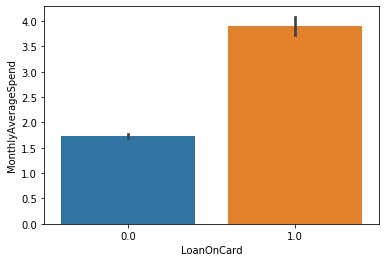

In [203]:
sns.barplot(x="LoanOnCard",y = "MonthlyAverageSpend",data=data)

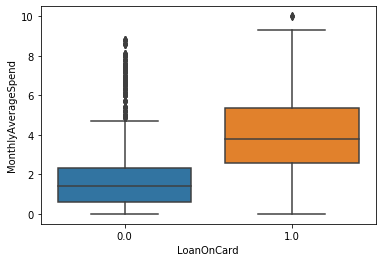

In [204]:
sns.boxplot(x="LoanOnCard",y = "MonthlyAverageSpend",data=data)

1. On average, the people who are associated longer tend to take a loan from the bank
2. However, it is difficult to say this at the extremeties, since the data suggests that there are people who are associated longer with the bank but did not take a loan.    

In [205]:
mean_Mortgage_opted = np.mean(data['Mortgage'][data['LoanOnCard']==0])
mean_Mortgage_not_opted = np.mean(data['Mortgage'][data['LoanOnCard']==1])

count_Mortgage_opted_less_than_mean = data['Mortgage'][(data['Mortgage']<mean_Mortgage_opted) & (data['LoanOnCard']==0)].count()
count_Mortgage_opted_greater_than_mean = data['Mortgage'][(data['Mortgage']>mean_Mortgage_opted) & (data['LoanOnCard']==0)].count()
per_Mortgage_opted_less_than_mean = round(count_Mortgage_opted_less_than_mean/(count_Mortgage_opted_less_than_mean+count_Mortgage_opted_greater_than_mean)*100,2)
per_Mortgage_opted_greater_than_mean = round(count_Mortgage_opted_greater_than_mean/(count_Mortgage_opted_less_than_mean+count_Mortgage_opted_greater_than_mean)*100,2)

count_Mortgage_not_opted_less_than_mean = data['Mortgage'][(data['Mortgage']<mean_Mortgage_not_opted) & (data['LoanOnCard']==1)].count()
count_Mortgage_not_opted_greater_than_mean = data['Mortgage'][(data['Mortgage']>mean_Mortgage_not_opted) & (data['LoanOnCard']==1)].count()
per_Mortgage_not_opted_less_than_mean = round(count_Mortgage_not_opted_less_than_mean/(count_Mortgage_not_opted_less_than_mean+count_Mortgage_not_opted_greater_than_mean)*100,2)
per_Mortgage_not_opted_greater_than_mean = round(count_Mortgage_not_opted_greater_than_mean/(count_Mortgage_not_opted_less_than_mean+count_Mortgage_not_opted_greater_than_mean)*100,2)


####
median_Mortgage_opted = np.median(data['Mortgage'][data['LoanOnCard']==0])
median_Mortgage_not_opted = np.median(data['Mortgage'][data['LoanOnCard']==1])

df_temp = pd.DataFrame({'Mean':[mean_Mortgage_opted,mean_Mortgage_not_opted],
                       'Count_less_than_mean':[str(count_Mortgage_opted_less_than_mean)+' (' + str(per_Mortgage_opted_less_than_mean)+'%)',str(count_Mortgage_not_opted_less_than_mean)+' (' + str(per_Mortgage_not_opted_less_than_mean)+'%)'],
                       'Count_greater_than_mean':[str(count_Mortgage_opted_greater_than_mean)+' (' + str(per_Mortgage_opted_greater_than_mean)+'%)',str(count_Mortgage_not_opted_greater_than_mean)+' (' + str(per_Mortgage_not_opted_greater_than_mean)+'%)'],
                       'Median':[median_Mortgage_opted,median_Mortgage_not_opted]},index=['Not opted','Opted'])
df_temp

,Mean,Count_less_than_mean,Count_greater_than_mean,Median
Not opted,51.789381,3150 (69.69%),1370 (30.31%),0.0
Opted,100.845833,325 (67.71%),155 (32.29%),0.0


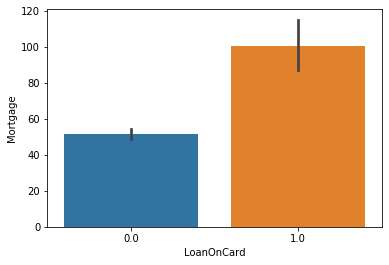

In [206]:
sns.barplot(x="LoanOnCard",y = "Mortgage",data=data)

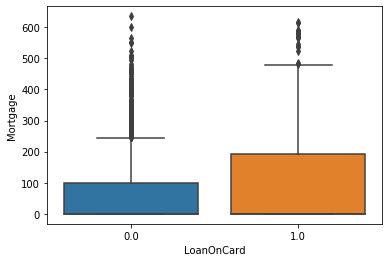

In [207]:
sns.boxplot(x="LoanOnCard",y = "Mortgage",data=data)

1. The mean motagage units of the people who took the loan is higher than that of the people who did not took the loan.
2. It is convenient to say that the people with less mortagage units tend not to take a loan from the bank. However, the people with higher mortgage units may or may not take the loan. 

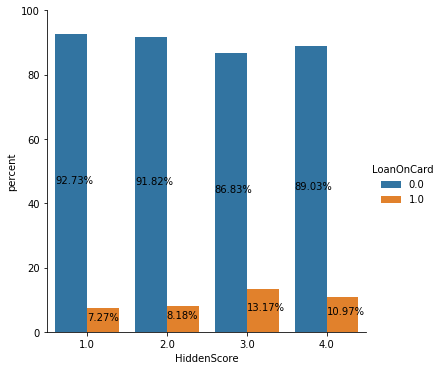

In [332]:
hdn_scr_per = data.groupby('HiddenScore')['LoanOnCard'].value_counts(normalize=True)
hdn_scr_per = hdn_scr_per.mul(100)
hdn_scr_per = hdn_scr_per.rename('percent').reset_index()

g = sns.catplot(x='HiddenScore',y='percent',hue='LoanOnCard',kind='bar',data=hdn_scr_per)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    anot = str(p.get_height().round(2)) + '%'
    anot_pos_x = p.get_x() 
    anot_pos_y = p.get_height()
    g.ax.text(anot_pos_x,anot_pos_y/2,anot)

The people belonging to the hidden score class of 3 tend to take a loan than the others.

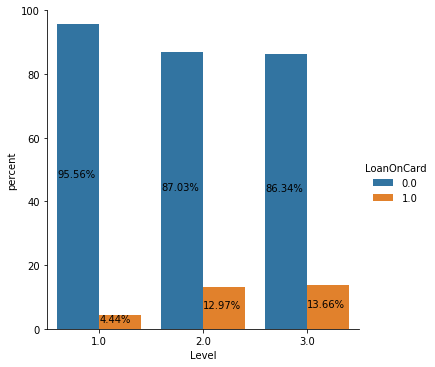

In [209]:
level_per = data.groupby('Level')['LoanOnCard'].value_counts(normalize=True)
level_per = level_per.mul(100)
level_per = level_per.rename('percent').reset_index()

g = sns.catplot(x='Level',y='percent',hue='LoanOnCard',kind='bar',data=level_per)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    anot = str(p.get_height().round(2)) + '%'
    anot_pos_x = p.get_x() 
    anot_pos_y = p.get_height()
    g.ax.text(anot_pos_x,anot_pos_y/2,anot)

The people belonging to the level 1 less likely to take a loan than the people belonging to the other levels. 

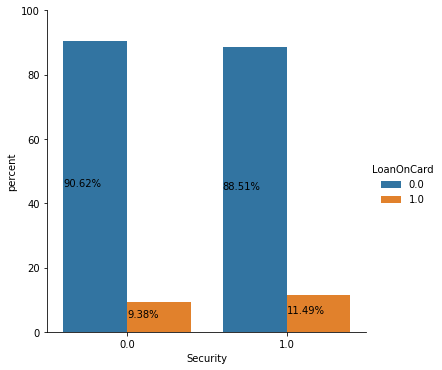

In [210]:
security_per = data.groupby('Security')['LoanOnCard'].value_counts(normalize=True)
security_per = security_per.mul(100)
security_per = security_per.rename('percent').reset_index()

g = sns.catplot(x='Security',y='percent',hue='LoanOnCard',kind='bar',data=security_per)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    anot = str(p.get_height().round(2)) + '%'
    anot_pos_x = p.get_x() 
    anot_pos_y = p.get_height()
    g.ax.text(anot_pos_x,anot_pos_y/2,anot)

The people who have a security asset with the bank have a very slight chance of taking loan than the others.

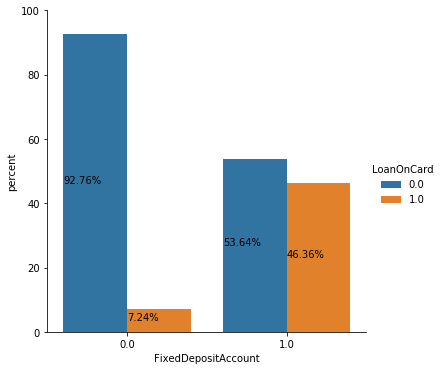

In [211]:
fd_per = data.groupby('FixedDepositAccount')['LoanOnCard'].value_counts(normalize=True)
fd_per = fd_per.mul(100)
fd_per = fd_per.rename('percent').reset_index()

g = sns.catplot(x='FixedDepositAccount',y='percent',hue='LoanOnCard',kind='bar',data=fd_per)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    anot = str(p.get_height().round(2)) + '%'
    anot_pos_x = p.get_x() 
    anot_pos_y = p.get_height()
    g.ax.text(anot_pos_x,anot_pos_y/2,anot)

The people who opened a fixed deposit account with the bank have a significantly higher chance of taking a loan than the people who do not have one. 

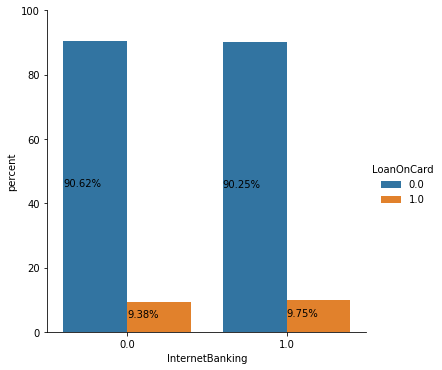

In [212]:
ib_per = data.groupby('InternetBanking')['LoanOnCard'].value_counts(normalize=True)
ib_per = ib_per.mul(100)
ib_per = ib_per.rename('percent').reset_index()

g = sns.catplot(x='InternetBanking',y='percent',hue='LoanOnCard',kind='bar',data=ib_per)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    anot = str(p.get_height().round(2)) + '%'
    anot_pos_x = p.get_x() 
    anot_pos_y = p.get_height()
    g.ax.text(anot_pos_x,anot_pos_y/2,anot)

1. It is very difficult to say if the people who opted for internet banking will take a loan. 
2. Also, it is equally difficult to say that the people who did not opted for internet banking will not take a loan.

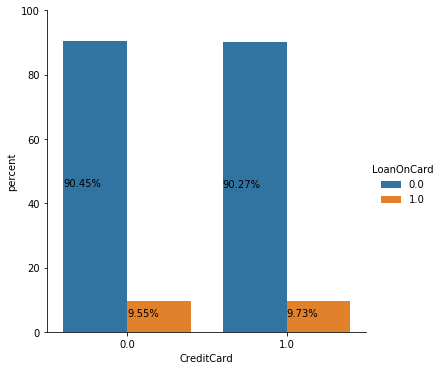

In [213]:
cc_per = data.groupby('CreditCard')['LoanOnCard'].value_counts(normalize=True)
cc_per = cc_per.mul(100)
cc_per = cc_per.rename('percent').reset_index()

g = sns.catplot(x='CreditCard',y='percent',hue='LoanOnCard',kind='bar',data=cc_per)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    anot = str(p.get_height().round(2)) + '%'
    anot_pos_x = p.get_x() 
    anot_pos_y = p.get_height()
    g.ax.text(anot_pos_x,anot_pos_y/2,anot)

1. Large percentage of the people who did not took a credit card, also, did not take a loan.
2. The percentage of the people who took a credit card and also took a loan is very small.  

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 4 Data pre-processing

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Segregate predictors vs target attributes

In [214]:
X = data.drop('LoanOnCard',axis=1)
Y = data['LoanOnCard']

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Check for target balancing

In [215]:
data['LoanOnCard'].value_counts(normalize='True')

0.0    0.904
1.0    0.096
Name: LoanOnCard, dtype: float64

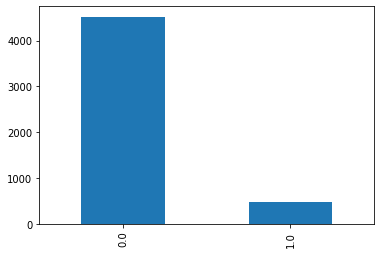

In [216]:
pd.value_counts(data["LoanOnCard"]).plot(kind="bar")

Here, we see that the target variable is not balanced. However, we proceed to the machine learning step.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Perform train-test split

In [217]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
1334,47.0,22.0,35.0,2.0,1.3,1.0,0.0,0.0,0.0,1.0,0.0
4768,38.0,14.0,39.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0
65,59.0,35.0,131.0,1.0,3.8,1.0,0.0,0.0,0.0,1.0,1.0
177,29.0,3.0,65.0,4.0,1.8,2.0,244.0,0.0,0.0,0.0,0.0
4489,39.0,13.0,21.0,3.0,0.2,2.0,0.0,0.0,0.0,1.0,0.0


In [218]:
y_train.value_counts(normalize='True')

0.0    0.905429
1.0    0.094571
Name: LoanOnCard, dtype: float64

In [219]:
y_test.value_counts(normalize='True')

0.0    0.900667
1.0    0.099333
Name: LoanOnCard, dtype: float64

Here, we see that the training and the testing variables, also are imbalanced. However, the proportion of different classes is close to that of the original data.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 5 Model training, testing and tuning

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Design and train a Logistic regression 

In [220]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Display the classification accuracies for train and test data

In [221]:
print('Classification accuracy of the train data :',model.score(x_train, y_train))

Classification accuracy of the test data : 0.952


In [222]:
print('Classification accuracy of the test data :',model.score(x_test, y_test))

Classification accuracy of the test data : 0.9446666666666667


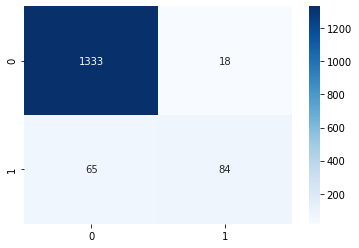

In [223]:
conf_mat = metrics.confusion_matrix(y_test,y_predict)
df_conf_mat = pd.DataFrame(conf_mat)
sns.heatmap(df_conf_mat,annot=True,cmap='Blues',fmt='g')

From the confusion matrix we can say that:
1. True Positives (TP): we correctly predicted that they took loan are 84
2. True Negatives (TN): we correctly predicted that they they did not take loan are 1333
3. False Positives (FP): we incorrectly predicted that they they took loan are 18 - Type I error
4. False Negatives (FN): we incorrectly predicted that they they did not took loan are 65 - Type II error

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Classification report

In [224]:
print(metrics.classification_report(y_test,y_predict,digits=2))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1351
         1.0       0.82      0.56      0.67       149

    accuracy                           0.94      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500



Using the solver 'liblinear': 
1. We observe that 95% and 82% of the testing varaibles is correctly identified as opted for loan out of the total identified positives of opted and not opted respectively.
2.  We observe that 99% and 56% of the testing varaibles is correctly identified as opted for loan out of the total true actual positives of opted and not opted respectively.
3. Also, we observe that 94% of the testing varaibles is correctly identified as either opted for loan or not opted for loan of all the testing varaibles.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> • Design and train a Naive Bayes classifiers

In [225]:
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
y_predict_NB = model_NB.predict(x_test)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Classification accuracies for train and test data

In [226]:
print('Classification accuracy of the test data :',model_NB.score(x_train, y_train))

Classification accuracy of the test data : 0.89


In [227]:
print('Classification accuracy of the test data :',model_NB.score(x_test, y_test))

Classification accuracy of the test data : 0.8746666666666667


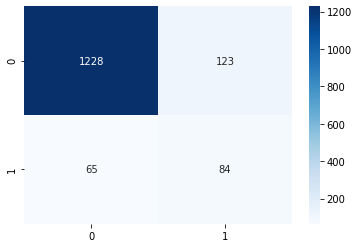

In [228]:
conf_mat = metrics.confusion_matrix(y_test,y_predict_NB)
df_conf_mat = pd.DataFrame(conf_mat)
sns.heatmap(df_conf_mat,annot=True,cmap='Blues',fmt='g')

From the confusion matrix we can say that:
1. True Positives (TP): we correctly predicted that they took loan are 84
2. True Negatives (TN): we correctly predicted that they they did not take loan are 1228
3. False Positives (FP): we incorrectly predicted that they they took loan are 123 - Type I error
4. False Negatives (FN): we incorrectly predicted that they they did not took loan are 65 - Type II error

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Display and explain the classification report in detail

In [229]:
print(metrics.classification_report(y_test,y_predict_NB,digits=2))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      1351
         1.0       0.41      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



Using the Naive Bayes classifier: 
1. We observe that 95% and 41% of the testing varaibles is correctly identified as opted for loan out of the total identified positives of opted and not opted respectively.
2.  We observe that 91% and 56% of the testing varaibles is correctly identified as opted for loan out of the total true actual positives of opted and not opted respectively.
3. Also, we observe that 87% of the testing varaibles is correctly identified as either opted for loan or not opted for loan of all the testing varaibles.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Apply all the possible tuning techniques to train the best model for the given data

In [230]:
solvers = ['newton-cg', 'liblinear']
c_values = [100,10,1,0.1,0.01]

hyperparameters = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(LogisticRegression(),hyperparameters,cv=cv,scoring='accuracy')
best_model = grid_search.fit(x_train,y_train)

print('Best solver: ', (best_model.best_estimator_.get_params()['solver']))
print('Best penalty: ', (best_model.best_estimator_.get_params()['penalty']))
print('Best c_values: ', (best_model.best_estimator_.get_params()['C']))
print('Best accuracy: ', (best_model.best_score_))

Best solver:  liblinear
Best penalty:  l2
Best c_values:  100
Best accuracy:  0.9524761904761904


Using grid search, we find that the best accuracy of 95.24% is obtained using liblinear and a c_value of 100. 

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 6 Conclusion

1. The given classification problem consists of target advertisements to improve the conversion ratio of a bank.
2. From the EDA, it is observed that the age, association with the bank have negative correlation with the target variable.
3. Also, the mostly correlated variables are the highest spend and the monthly average spend.
4. Other variables like internet banking and credit card are not that influential on the target variable.
5. Using logistic regression, we are able to obtain 94% classification accuracy. 
6. Using grid search, there is only marginal increase in the accuracy of the logistic regression model.
7. However, using Naive Bayes classifier, we are able to obtain only 87.5% classification accuracy. 

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 7 Improvisation

1. Given the binary classification problem one should try SVM, Decision tree etc... to obtain better results.
2. The given data seem to be well collected but for improvisation purposes, one can also look at other attributes like the personal income, number of dependents, personal loan etc...